In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [10]:
oecd_bli = pd.read_csv("C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/oecd_bli_2015.csv", thousands = ',')
gdp_per_capita =pd.read_csv("C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/gdp_per_capita.csv", thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")

In [11]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(
        index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
 
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [12]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

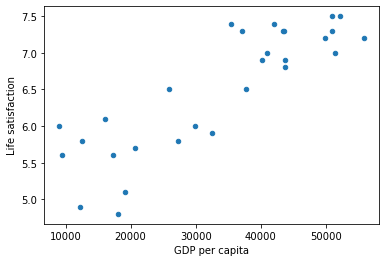

In [13]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [14]:
model = sklearn.linear_model.LinearRegression()

In [15]:
model.fit(X, y)

LinearRegression()

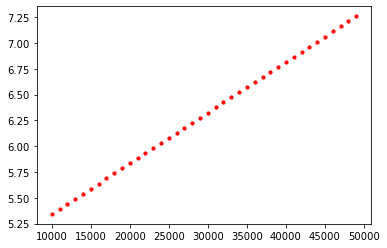

In [16]:
for x in range(10, 50):
    plot_x = 1000 * x
    plot_y = float(model.predict([[plot_x]]))
    plt.scatter(plot_x, plot_y, s=10, color='r')
plt.show()

In [17]:
#prediction for Cyprus
X_new = [[22587]] # Cyprus's GDP per capita
print(model.predict(X_new))

[[5.96242338]]
